In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import statsmodels.api as sm

In [2]:
df = pd.read_csv('cleaned.csv')

In [3]:
df

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalOrderValue
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...
338177,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
338178,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
338179,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
338180,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
current_date = max(df['InvoiceDate'])

In [6]:
# Grouping by same Customer ID and aggregating the Values.
data = df.groupby(['CustomerID'],as_index=False).agg({'InvoiceDate':lambda x:(current_date-x.max()).days,
                                                      'InvoiceNo':'count',
                                                    'TotalOrderValue':'sum'}) 
data.head()

,CustomerID,InvoiceDate,InvoiceNo,TotalOrderValue
0,12347.0,1,166,3314.73
1,12348.0,248,6,90.20
2,12349.0,18,58,999.15
3,12350.0,309,16,294.40
4,12352.0,35,66,1130.94


In [7]:
# Creating the Monetory Bucket Value
data['monetary'] = data.TotalOrderValue/data.InvoiceNo

In [8]:
data

,CustomerID,InvoiceDate,InvoiceNo,TotalOrderValue,monetary
0,12347.0,1,166,3314.73,19.968253
1,12348.0,248,6,90.20,15.033333
2,12349.0,18,58,999.15,17.226724
3,12350.0,309,16,294.40,18.400000
4,12352.0,35,66,1130.94,17.135455
...,...,...,...,...,...
4187,18280.0,277,8,137.00,17.125000
4188,18281.0,180,5,46.92,9.384000
4189,18282.0,7,8,113.13,14.141250
4190,18283.0,3,752,2051.98,2.728697


In [9]:
data = data.drop(columns=['TotalOrderValue'],axis = 1)

In [10]:
data = data.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency'})

In [11]:
data

,CustomerID,Recency,Frequency,monetary
0,12347.0,1,166,19.968253
1,12348.0,248,6,15.033333
2,12349.0,18,58,17.226724
3,12350.0,309,16,18.400000
4,12352.0,35,66,17.135455
...,...,...,...,...
4187,18280.0,277,8,17.125000
4188,18281.0,180,5,9.384000
4189,18282.0,7,8,14.141250
4190,18283.0,3,752,2.728697


# Calculating RFM score and RFM Segementation

In [12]:
data['F'] = pd.qcut(x = data['Frequency'],q=4,labels = range(1,5,1))
data['M'] = pd.qcut(x = data['monetary'],q=4,labels = range(1,5,1))
data['R'] = pd.qcut(x = data['Recency'],q=4,labels = range(4,0,-1))
data.head()

,CustomerID,Recency,Frequency,monetary,F,M,R
0,12347.0,1,166,19.968253,4,4,4
1,12348.0,248,6,15.033333,1,2,1
2,12349.0,18,58,17.226724,3,3,3
3,12350.0,309,16,18.400000,2,3,1
4,12352.0,35,66,17.135455,3,3,3


In [13]:
data['RFM_Segment'] = data['R'].astype(str) + data['F'].astype(str) + data['M'].astype(str)
data['RFM_Score'] = data[['R','F','M']].sum(axis=1)
data.head()

,CustomerID,Recency,Frequency,monetary,F,M,R,RFM_Segment,RFM_Score
0,12347.0,1,166,19.968253,4,4,4,444,12
1,12348.0,248,6,15.033333,1,2,1,112,4
2,12349.0,18,58,17.226724,3,3,3,333,9
3,12350.0,309,16,18.400000,2,3,1,123,6
4,12352.0,35,66,17.135455,3,3,3,333,9


In [14]:
data['RFM_Score'].max()

12

In [15]:
data['RFM_Score'].min()

3

In [16]:
data.groupby('RFM_Score').agg({'Recency': 'mean',
                                   'Frequency': 'mean',
                                   'monetary': ['mean', 'count'] }).round(1)

Recency Frequency monetary      
             mean      mean     mean count
RFM_Score                                 
3           236.6       8.5      6.4    56
4           241.4      13.5     10.5   254
5           206.3      24.4     12.0   418
6           157.6      27.3     18.1   673
7            79.9      42.9     17.0   685
8            47.3      76.5     16.9   744
9            25.6     167.8     16.4   653
10           18.1     126.6     19.3   362
11           11.0     159.4     22.6   255
12            5.7     254.1     25.9    92

In [17]:
# Giving the title of the customer on the basis of the performance
def create_segment(df):
    if df['RFM_Score'] >= 12:
        return 'Top-Value'
    elif (df['RFM_Score'] >= 9) and (df['RFM_Score'] < 12):
        return 'High-Value'
    elif (df['RFM_Score'] >= 6) and (df['RFM_Score'] < 9):
        return 'Mid-Value'
    else:
        return 'Low-Value'
    
data['General_Segment'] = data.apply(create_segment, axis=1)
data.groupby('General_Segment').agg({'Recency': 'mean',
                                         'Frequency': 'mean',
                                         'monetary': ['mean', 'count']}).round(1)

Recency Frequency monetary      
                   mean      mean     mean count
General_Segment                                 
High-Value         20.5     154.4     18.4  1270
Low-Value         220.9      19.4     11.0   728
Mid-Value          93.2      49.8     17.3  2102
Top-Value           5.7     254.1     25.9    92

<Axes: xlabel='monetary', ylabel='Count'>

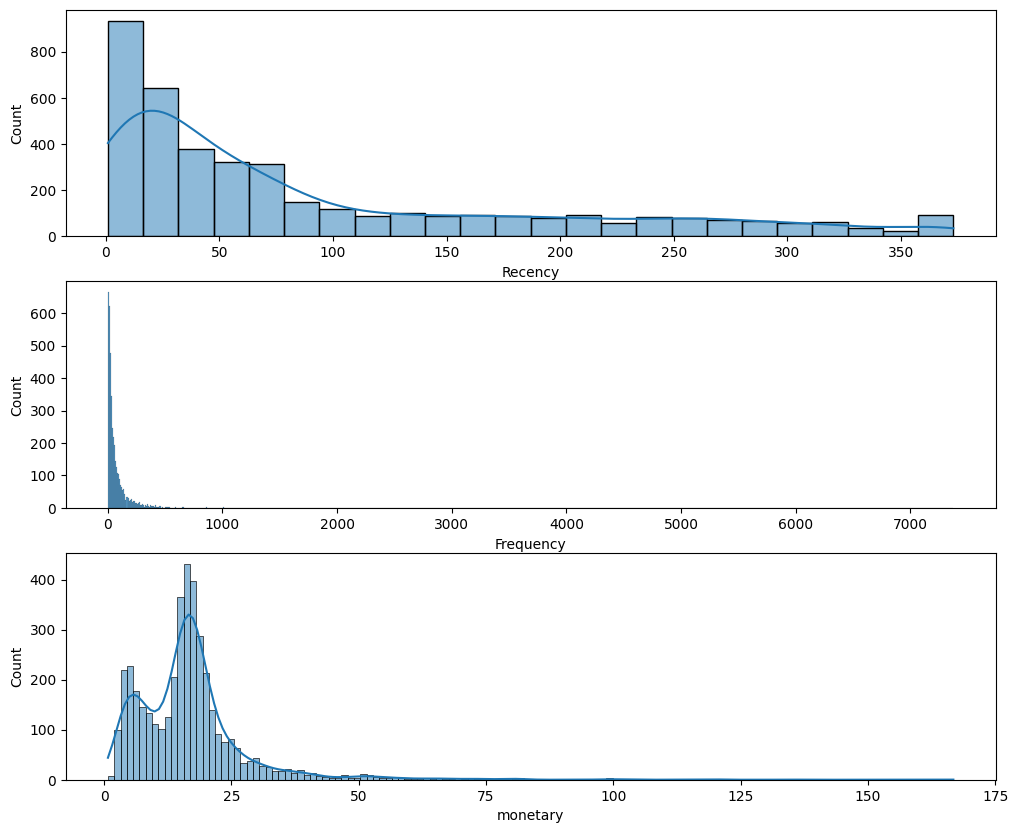

In [53]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))

# Plot distribution of var1
plt.subplot(3, 1, 1); 
sns.histplot(data['Recency'],kde=True)

# Plot distribution of var2
plt.subplot(3, 1, 2); 
sns.histplot(data['Frequency'])

# Plot distribution of var3
plt.subplot(3, 1, 3); 
sns.histplot(data['monetary'],kde=True)

In [19]:
data[data['monetary'] == 0]

,CustomerID,Recency,Frequency,monetary,F,M,R,RFM_Segment,RFM_Score,General_Segment
206,12603.0,21,1,0.0,1,1,3,311,5,Low-Value


In [20]:
data = data[data['monetary'] > 0]
data.reset_index(drop=True,inplace=True)

In [21]:
data.count()

CustomerID         4191
Recency            4191
Frequency          4191
monetary           4191
F                  4191
M                  4191
R                  4191
RFM_Segment        4191
RFM_Score          4191
General_Segment    4191
dtype: int64

In [22]:
data = data[(data != 0).all(axis=1)]

In [23]:
raw_data = data[['Recency','Frequency','monetary']]

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
# Normalizing  data using Log Transformation (log transformation compresses the large value and expand the small values.
data_log = np.log(raw_data)


scaler = StandardScaler()
scaler.fit(data_log)


data_normalized = scaler.transform(data_log)
data_norm = pd.DataFrame(data=data_log, index=raw_data.index, columns=raw_data.columns)

C:\Users\rishi\AppData\Local\Temp\ipykernel_24680\1607170815.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(data_norm['Recency'])
C:\Users\rishi\AppData\Local\Temp\ipykernel_24680\1607170815.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(data

<Axes: xlabel='monetary', ylabel='Density'>

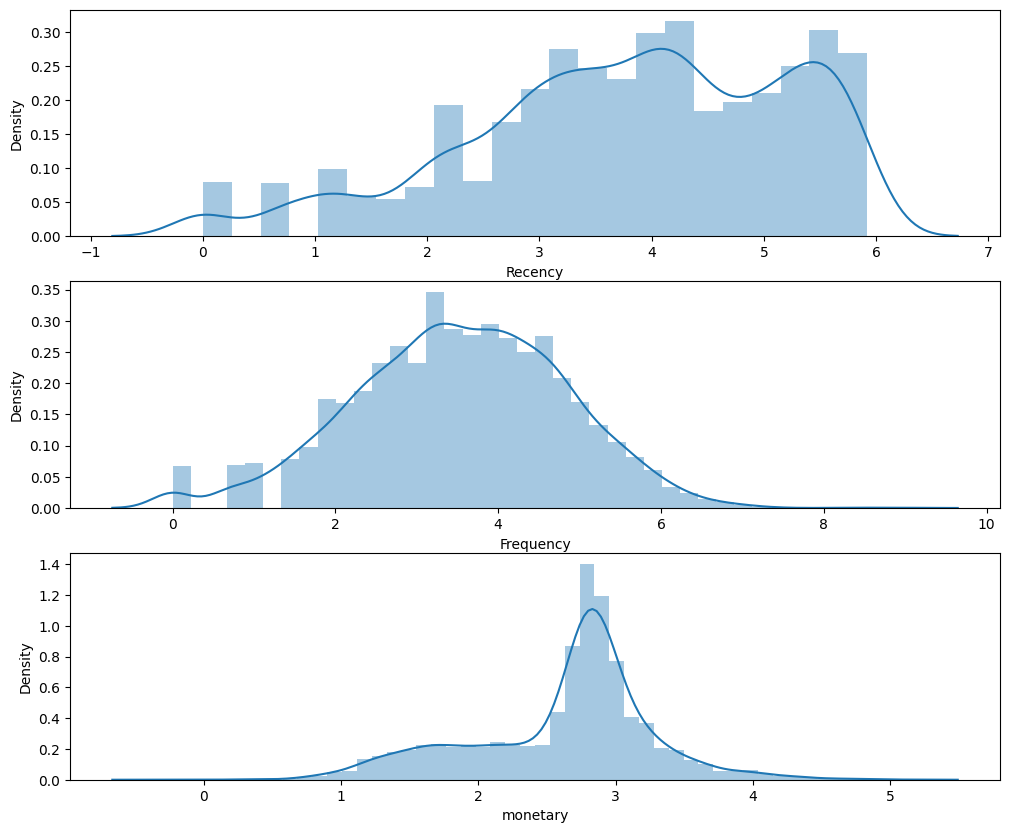

In [27]:

plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(data_norm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(data_norm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(data_norm['monetary'])

# Show the plot

In [28]:
from sklearn.mixture import GaussianMixture

In [29]:
# GMM Mode Checking for the Optimal Clusters
n_comp = np.arange(1,10)
models = [GaussianMixture(n_components=n,random_state=150).fit(data_norm) for n in n_comp]

Text(0.5, 0, 'Number of Components')

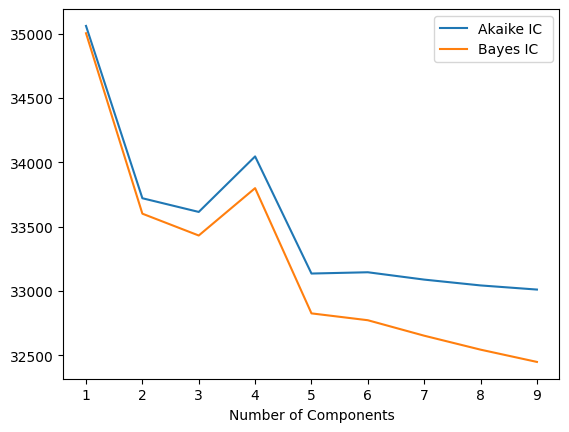

In [30]:
#Plot AIC and BIC for optimal cluster.
plt.plot(n_comp,
         [m.bic(data_norm) for m in models],
         label = 'Akaike IC ')
plt.plot(n_comp,
         [m.aic(data_norm) for m in models],
         label = 'Bayes IC')
plt.legend()
plt.xlabel('Number of Components')

In [31]:
model = GaussianMixture(n_components=4,random_state=150).fit(data_norm)

In [32]:
cluster = pd.Series(model.predict(data_norm))

In [33]:
data_norm['cluster'] = cluster

In [34]:
data_gmm = data.assign(Cluster = cluster)

In [35]:
data_gmm

,CustomerID,Recency,Frequency,monetary,F,M,R,RFM_Segment,RFM_Score,General_Segment,Cluster
0,12347.0,1,166,19.968253,4,4,4,444,12,Top-Value,0.0
1,12348.0,248,6,15.033333,1,2,1,112,4,Low-Value,1.0
2,12349.0,18,58,17.226724,3,3,3,333,9,High-Value,2.0
3,12350.0,309,16,18.400000,2,3,1,123,6,Mid-Value,1.0
4,12352.0,35,66,17.135455,3,3,3,333,9,High-Value,3.0
...,...,...,...,...,...,...,...,...,...,...,...
4186,18280.0,277,8,17.125000,1,3,1,113,5,Low-Value,NaN
4187,18281.0,180,5,9.384000,1,1,1,111,3,Low-Value,NaN
4188,18282.0,7,8,14.141250,1,2,4,412,7,Mid-Value,NaN
4189,18283.0,3,752,2.728697,4,1,4,441,9,High-Value,NaN


In [36]:
data_norm

,Recency,Frequency,monetary,cluster
0,0.000000,5.111988,2.994144,0.0
1,5.513429,1.791759,2.710270,1.0
2,2.890372,4.060443,2.846462,2.0
3,5.733341,2.772589,2.912351,1.0
4,3.555348,4.189655,2.841150,3.0
...,...,...,...,...
4186,5.624018,2.079442,2.840539,NaN
4187,5.192957,1.609438,2.239006,NaN
4188,1.945910,2.079442,2.649096,NaN
4189,1.098612,6.622736,1.003824,NaN


In [37]:
data_norm.cluster.value_counts()

cluster
3.0    1350
0.0    1044
2.0     933
1.0     690
Name: count, dtype: int64

In [38]:
main = pd.DataFrame(model.means_,
            columns=list(data_norm.iloc[:,:-1].columns))

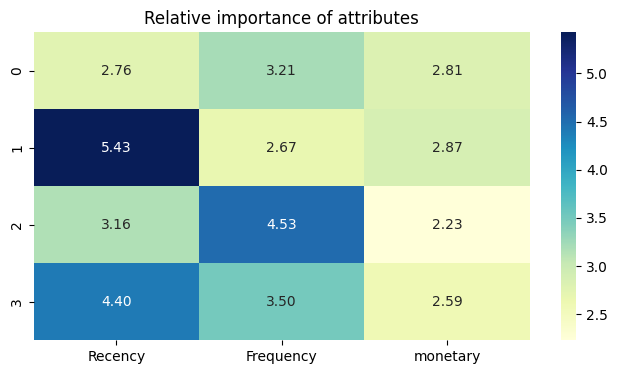

In [56]:
plt.figure(figsize=(8, 4))
plt.title('Relative importance of attributes')
sns.heatmap(data=main, annot=True, fmt='.2f', cmap='YlGnBu')
plt.show()

# As per the Analysis

Group 0 - Premium Customers (Low Recency, High Frequency, High Monetary Value): 
Description: Premium Customers are those who have recently made frequent and substantial purchases. They exhibit a high level of engagement and loyalty, making them valuable assets to your business for the long run
.
Group 1 - Potential Valuable Customers (High Recency, Medium Frequency, Medium Monetary Valu :

Description: Potential Valuable Customers are relatively new to your store but have shown recent interest with moderate frequency and spending. There is potential for them to become more valuable over time as they continue to engage with your busi

ness.
Group 2 - Frequent Visitors with Acquisition Challenges (Medium Recency, High Frequency, Low Monetary V ue):

Description: This group consists of individuals who visit your store frequently but may not yet contribute significantly in terms of monetary value. While their frequent visits are positive, there may be challenges in converting them into high-value cus

tomers.
Group 3 - At-Risk Old CuHighmers (Low Recency, Low Frequency, Low Monetar Value):

Description: At-Risk Old Customers are customers who were once active but have shown a decline in recency, frequency, and monetary contributions. They are on the verge of being lost, and efforts should be made to re-engage and retain them before they disengage completely.